In [2]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy.signal import resample

import sys
import os
sys.path.append("../") # for importing utils and glm

import pandas as pd

# plotting packages
%matplotlib inline
from matplotlib.pyplot import * # plotting functions
import seaborn as sns           # data visualization package
sns.set_style("whitegrid")
sns.set_palette("cubehelix",7)

In [3]:
figroot = "/scratch/dstrf/figures/crcns_population/"


rcParams["svg.fonttype"]='none'
rc('font',**{'family':'serif','serif':['Times']})
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

ch = sns.color_palette("cubehelix",16).as_hex()
ch4 = sns.color_palette("cubehelix",4).as_hex()

rcParams["svg.fonttype"]='none'
rc('font',**{'family':'serif','serif':['Times']})
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [4]:
WX = "w0"
EOcut = 0.25
CORcut = 0.15

In [5]:
import pickle
# load mcmc results
exclude = []

def load_mldat(folder,root="/scratch/tyler/dstrf/results/rothman/"):

    path = "/".join([root,folder,""])
    results = {}
    
    for root, directories, filenames in os.walk(path):
        for filename in filenames: 
            if root.split("/")[6] in exclude: pass
            else:
                name, ext = filename.split(".")
                if ext == "dat":
                    with open(root+"/"+filename, 'rb') as interfile:
                        try:
                            results[name] = pickle.load(interfile)
                        except:
                            pass
                    
    maxlik = np.asarray([results[m]["w0"][:3] for m in results.keys() if results[m] and results[m]["eo"]>=EOcut and results[m]["eo"]>=EOcut and results[m]["corr"]>=CORcut])
    return results,maxlik

phasic_results, phasic_maxlik = load_mldat("phasic")
tonic_results, tonic_maxlik = load_mldat("tonic")


In [11]:
filtered_tonic = []

for x in tonic_maxlik:
    if np.max(np.abs(x)) < 100:
        filtered_tonic.append(x)
        
filtered_tonic = np.asarray(filtered_tonic)

In [12]:
filtered_phasic = []

for x in phasic_maxlik:
    if np.max(np.abs(x)) < 100:
        filtered_phasic.append(x)
        
filtered_phasic = np.asarray(filtered_phasic)

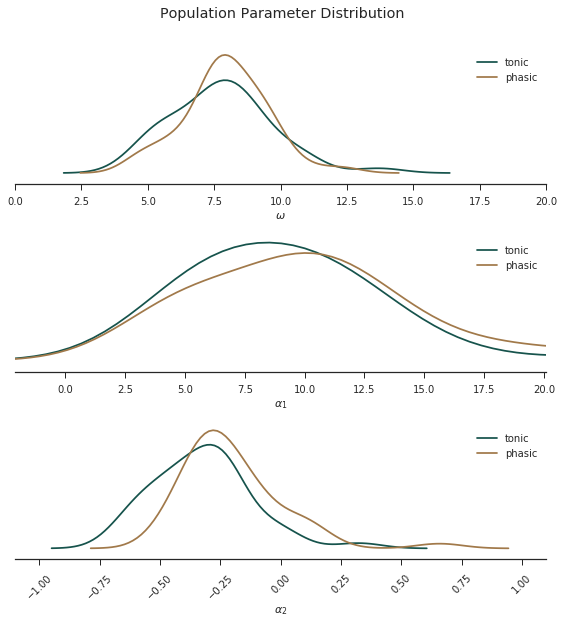

In [13]:
sns.set_style("ticks")
sns.set_palette("cubehelix",3)

figure(figsize=(8,8))

matlabs =  [r'$\omega$',r'$\alpha_1$',r'$\alpha_2$']

mrange=[[0, 20],
        [-2.1,  20.1],
        [-1.1,  1.1]],


HIST = False

for i in range(3):
    subplot(3,1,i+1)
    sns.distplot(filtered_tonic[:,i],hist=HIST,label="tonic")#,color=ch[9])
    sns.distplot(filtered_phasic[:,i],hist=HIST,label="phasic")#,color=ch[9])
    xlim(mrange[0][i])



    
    xlabel(matlabs[i])
    yticks([])
    sns.despine()
    
suptitle("Population Parameter Distribution",y=1.04)

tight_layout()
sns.despine(offset=5,left=True)
xticks(rotation=45)    
legend()
#savefig(figroot+"mat.svg",bbox_inches='tight')

In [ ]:
for k in 